The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Problem Statement:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
categorical_variables = df.select_dtypes(include = object)
categorical_variables.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [6]:
categorical_variables1 = df[['job', 'marital', 'education']]
categorical_variables2 = df[['default', 'housing', 'loan', 'contact', 'poutcome', 'y', 'month', 'day_of_week']]

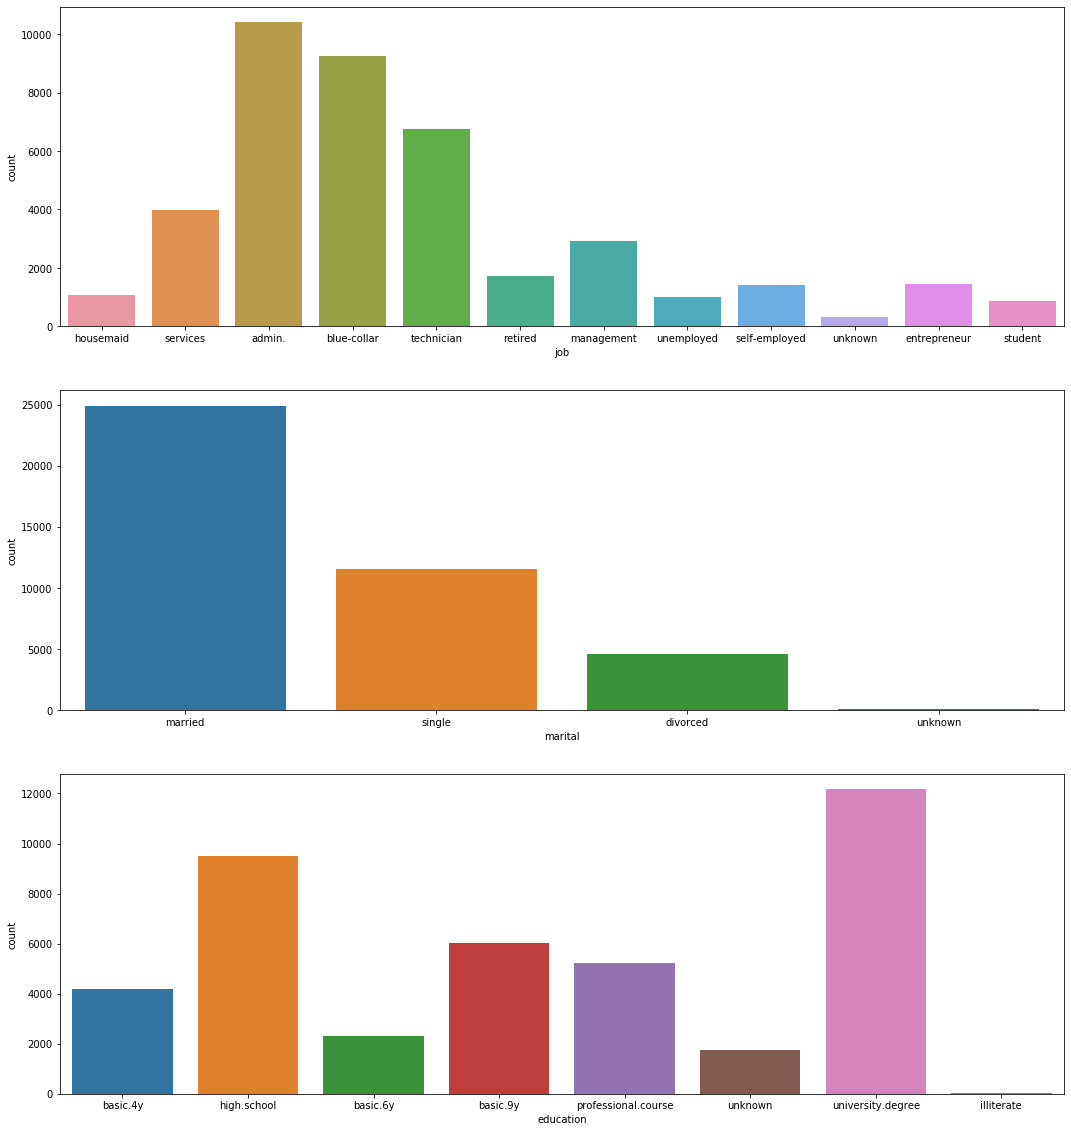

In [7]:
fig, ax = plt.subplots(3, 1, figsize = (18,20))
for i, subplot in zip(categorical_variables1, ax.flatten()):
    sns.countplot(df[i], ax = subplot)

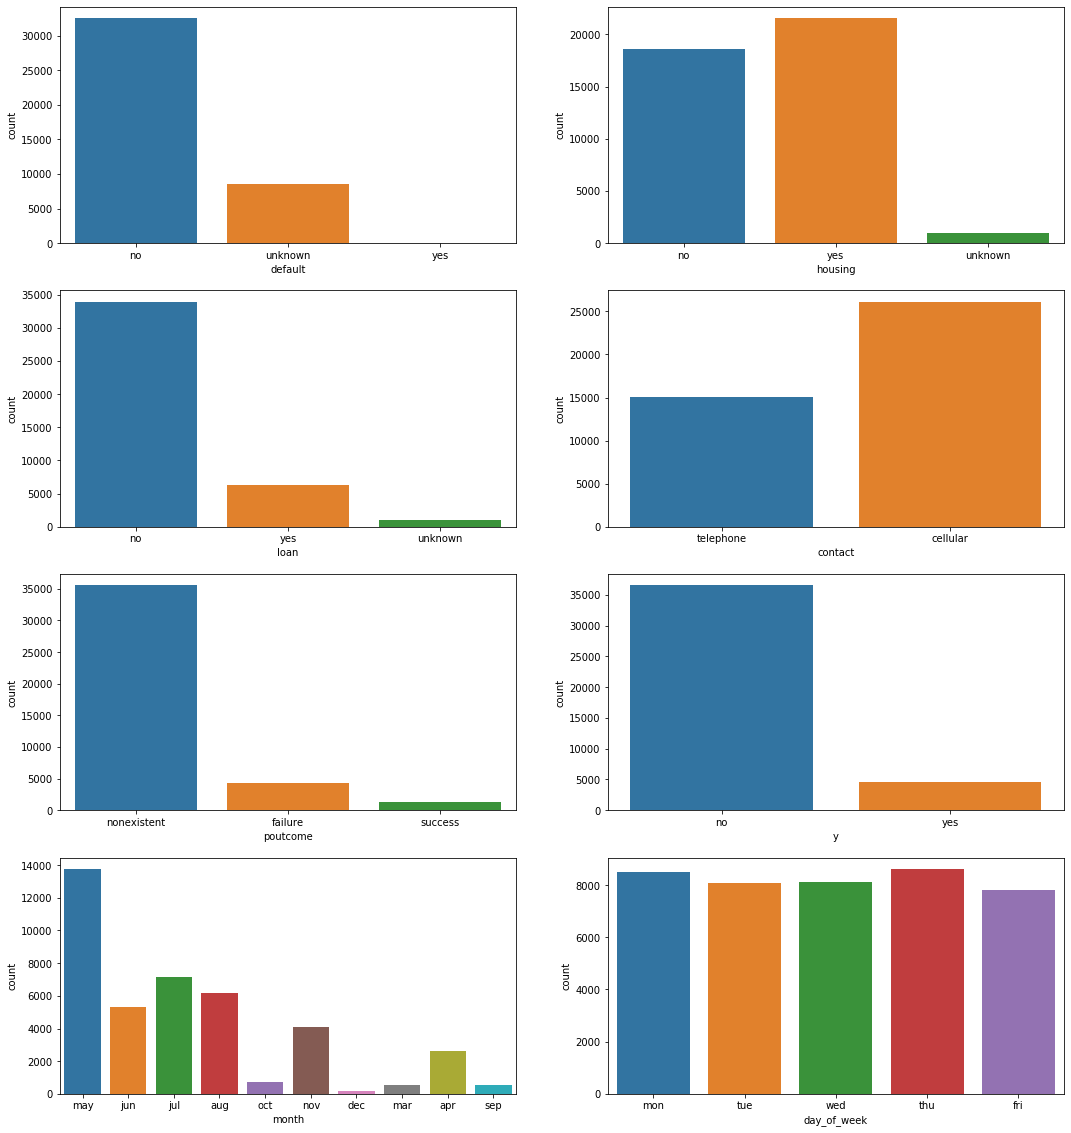

In [8]:
fig, ax = plt.subplots(4, 2, figsize = (18,20))
for i, subplot in zip(categorical_variables2, ax.flatten()):
    sns.countplot(df[i], ax = subplot)

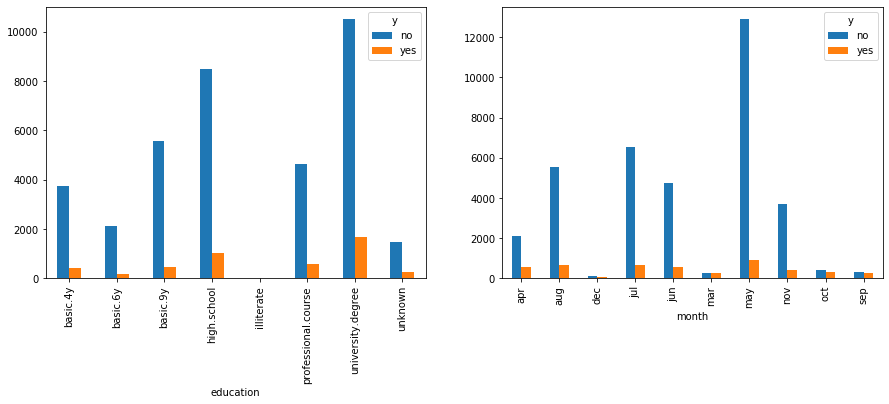

In [9]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(df['education'], df['y']).plot.bar(ax=ax[0])
pd.crosstab(df['month'], df['y']).plot.bar(ax=ax[1])

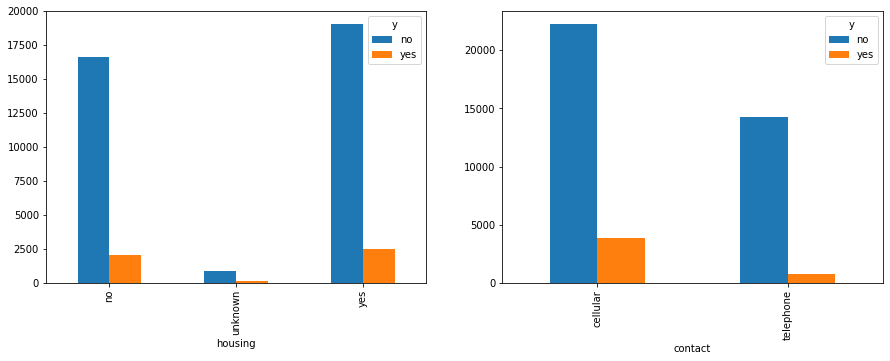

In [10]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(df['housing'], df['y']).plot.bar(ax=ax[0])
pd.crosstab(df['contact'], df['y']).plot.bar(ax=ax[1])

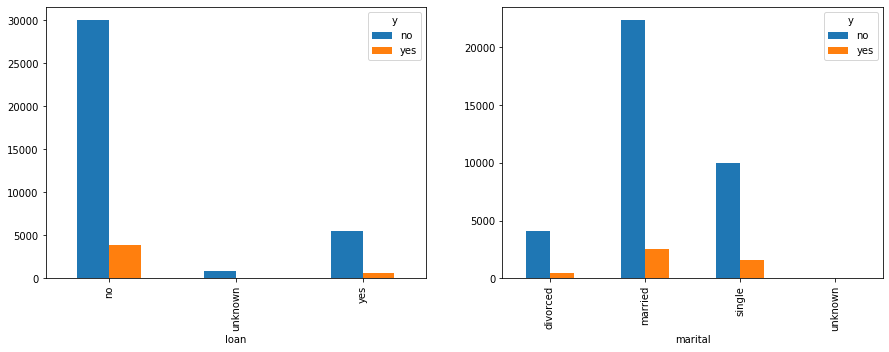

In [11]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(df['loan'], df['y']).plot.bar(ax=ax[0])
pd.crosstab(df['marital'], df['y']).plot.bar(ax=ax[1])

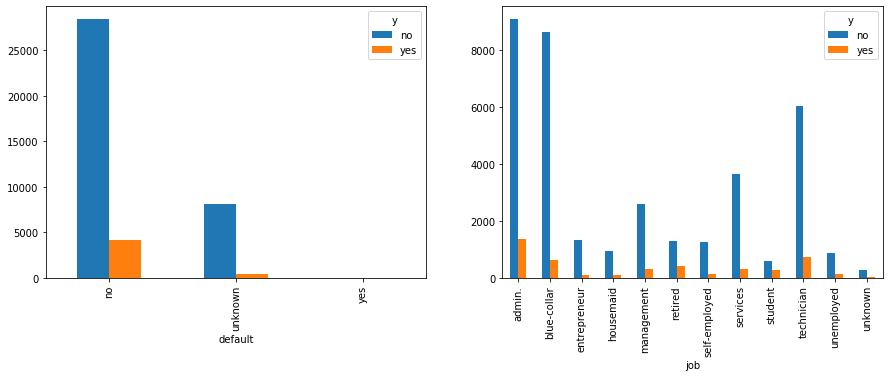

In [12]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(df['default'], df['y']).plot.bar(ax=ax[0])
pd.crosstab(df['job'], df['y']).plot.bar(ax=ax[1])

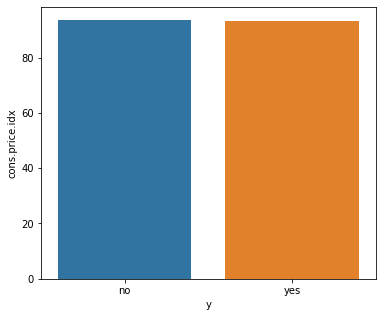

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(df['y'], df['cons.price.idx'])

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df1 = df.copy()

In [11]:
df1 = df1.rename({'pdays': 'passed_days', 'previous': 'no_of_contacts_performed', 'emp.var.rate': 'emp_var_rate',
               'cons.price.idx': 'consumer_price_index', 'cons.conf.idx': 'consumer_confidence_index',
               'euribor3m' : '3_month_rate', 'nr.employed': 'no_of_employees', 'y': 'term_deposit'}, axis = 1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'passed_days', 'no_of_contacts_performed', 'poutcome', 'emp_var_rate',
       'consumer_price_index', 'consumer_confidence_index', '3_month_rate',
       'no_of_employees', 'term_deposit'],
      dtype='object')

In [44]:
df1['job'] = df['job'].replace('unknown', df1['job'].value_counts().index[0])
df1['marital'] = df['marital'].replace('unknown', df1['marital'].value_counts().index[0])
df1['education'] = df['education'].replace('unknown', df1['education'].value_counts().index[0])
df1['default'] = df['default'].replace('unknown', df1['default'].value_counts().index[0])
df1['housing'] = df['housing'].replace('unknown', df1['housing'].value_counts().index[0])
df1['loan'] = df['loan'].replace('unknown', df1['loan'].value_counts().index[0])

In [47]:
df1.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [48]:
df1['education'] = df1['education'].replace({'illiterate': 0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 
                                            'high.school': 4, 'professional.course':5, 'university.degree': 6})
df1.education.value_counts()

6    13899
4     9515
3     6045
5     5243
1     4176
2     2292
0       18
Name: education, dtype: int64

In [49]:
df1.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [50]:
df1['month'] = df1['month'].replace({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
                                    'nov': 11, 'dec': 12})
df1.month.value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [51]:
df1['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [52]:
df1['poutcome'] = df1['poutcome'].replace({'nonexistent':1, 'failure': 2, 'success': 3})
df1['poutcome'].value_counts()

1    35563
2     4252
3     1373
Name: poutcome, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'passed_days', 'no_of_contacts_performed', 'poutcome', 'emp_var_rate',
       'consumer_price_index', 'consumer_confidence_index', '3_month_rate',
       'no_of_employees', 'term_deposit'],
      dtype='object')

In [57]:
df1['job'] = le.fit_transform(df1['job'])
df1['marital'] = le.fit_transform(df1['marital'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['contact'] = le.fit_transform(df1['contact'])
df1['term_deposit'] = le.fit_transform(df1['term_deposit'])
df1['day_of_week'] = le.fit_transform(df1['day_of_week'])

In [58]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,passed_days,no_of_contacts_performed,poutcome,emp_var_rate,consumer_price_index,consumer_confidence_index,3_month_rate,no_of_employees,term_deposit
0,56,3,1,1,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,4,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [59]:
x = df1.drop('term_deposit', axis = 1)
y = df1['term_deposit']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [72]:
parameters ={"learning_rate":[0.1,0.2,0.3],"max_depth":[4,5,6,7],"min_child_weight":[1, 3, 5, 7],"random_state":[1,2,3,4]}
classifier = XGBClassifier(n_estimators= 30)
grid = GridSearchCV(estimator= classifier, param_grid= parameters, scoring= 'accuracy', cv = 10, n_jobs = 1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=30, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 3, 5, 7],
          

In [75]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
grid.best_score_

0.917033564686192

In [85]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
print('Accuracy is', accuracy_score(y_test, xgb_pred))

Accuracy is 0.9166464352189042


In [87]:
print(confusion_matrix(y_test, xgb_pred))

[[10554   390]
 [  640   773]]


In [86]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10944
           1       0.66      0.55      0.60      1413

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.91     12357

